### Loading Required Packages

In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
stop_words = set(stopwords.words('english'))
import numpy as np
import spacy
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import warnings
warnings.filterwarnings('ignore')

### loading and Reading Datasets

In [3]:
#data = pd.read_csv('D://MSBA//Third Sem//NLP//group Project//archive (6)//spam_ham_dataset.csv')

In [18]:
dataframe = pd.read_csv('D://MSBA//Third Sem//NLP//group Project//dataset//lingSpam.csv')

In [5]:
#data = pd.read_csv('D://MSBA//Third Sem//NLP//group Project//mydatasets/enronSpamSubset.csv')

In [19]:
dataframe.head()

,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


In [20]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2605 non-null   int64 
 1   Body        2605 non-null   object
 2   Label       2605 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.2+ KB


##### Keep only email (text) data from the dataframe

In [21]:
data = dataframe.drop(columns = ["Label",  "Unnamed: 0"], axis = 1)

In [22]:

data = list(data.Body.values)

In [23]:
len(data)
    

2605

### Data Pre-Processing 

In [24]:
data[:3]

['Subject: great part-time or summer job !\n \n * * * * * * * * * * * * * * * we have display boxes with credit applications that we need to place in the small owner-operated stores in your area . here is what you do : 1 . introduce yourself to the store owner or manager . 2 . use our 90 % effective script which tells them how this little display box will save their customers hundreds of dollars , be a drawing card for their business , and make them from $ 5 . 00 to $ 15 . 00 or more for every app sent in . 3 . find a good spot on the counter , place the box there , and say that nothing more need be done , all you need is his name and address so the company can send him the commission checks . your compensaation will be $ 10 for every box you place . by becoming a representative you could also earn a commission of $ 10 for each application that came from that store . that is of course a much more profitable plan , as it will pay you for months or years for a very small effort . call 1-

In [25]:
def preprocessing (text):
    

    wnl = nltk.stem.WordNetLemmatizer()
    text = text.lower()
    text = re.sub("(http|https|www)(:|\.)\S+.com"," ",text)
    text = re.sub('[^a-zA-Z0-9\n]', ' ', text)
    text = re.sub("[^\w\d]"," ",text)
    text = re.sub("\d+"," ",text)
    text = re.sub('\s+',' ', text)
    text = " ".join([wnl.lemmatize(word.lower()) for word in text.split() if word.lower() not in nltk.corpus.stopwords.words("english")])
    return text


In [26]:
preprocessing(data[400])

'subject search credibility done dream member team earn figure income travel penny dollar working home make vocation vacation first year income earn weekly starting within week profit paid daily selling work home overhead employee high tech training support mlm x profitable multitrillion dollar travel industry incredible part business client call hobby serious inquireies call number information obligation hour toll free message ext'

In [27]:
preprocessed_email = [preprocessing(email) for email in data]

In [31]:
preprocessed_email[4]

'subject n miss attention warning adult warning adult year age interested sexually explicit material please hit keyboard delete button please excuse intrusion remove name mailing list send u email remove subject line need read available next day world record sex see video unbelievable true believe eye seen howard stern show world biggest gang bang see sexy annabel chong set world gang bang record fantastic video documentary chronicle hour sexathon men engaging sexual intercourse oral sex n worry stay hour watch selected exciting red hot scene breathtaking living color plenty extreme close ups video guaranteed knock sock leave breathless never seen anything like annabel take five men time minute order today plus shipping handling total gang bang ii record breaker starring jasmin st claire see beautiful voluptious jasmin st claire shatter annabel gang bang record taking men one hour sex session believe eye hot firey action see new world record established eye jasmin take five men time se

### Data Exploration

In this section, we will build the word cloud to visualize most common words in the corpus, so that we can get some insight, whether such common words are really important.

### Creating Wordcloud

In [ ]:
#pip install wordcloud

In [32]:
import wordcloud
from wordcloud import WordCloud

In [33]:
wordcloud = WordCloud(background_color = "white", max_words=100, contour_width = 10, contour_color ='steelblack', relative_scaling = 1)

In [34]:
all_email_text = ",".join(preprocessed_email)

In [35]:
wordcloud.generate(all_email_text)

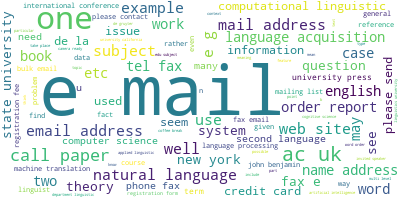

In [36]:
wordcloud.to_image()

from this initial wordcloud, we can see that most common words are infact nonstandard english words and also common words like subject, email, attach etc. are less important in this analysis. 

##### Remove 50 most common words, the words that are less than or equal to three characters and the words such as people names, months etc.

In [37]:
words = []
for i in preprocessed_email:
    for word in nltk.word_tokenize(i):
        words.append(word)

In [38]:
len(set(words))

48474

In [39]:
fd = nltk.FreqDist(word for word in words )
common_words = [w for (w,c) in fd.most_common(20)]
short_words = [w for(w,c) in fd.most_common() if len(w) <= 3]


In [40]:

less_frequent_words = [w for (w, v) in fd.items() if v <= 5]
len(less_frequent_words)

22106

In [41]:
namelist = [name.lower() for name in nltk.corpus.names.words()]


In [42]:
day_month = ['sunday', 'monday','tuesday', 'wednesday', 'thursday', 'friday', 
             'saturday', 'january', 'february', 'march', 'april', 'may', 'june', 
             'july', 'august', 'september', 'october', 'november', 'december']

In [43]:
extra_common = ['well', 'said', 'sent', 'also', 'e mail', "mail","would", 
                'should', 'must', 'research', 'email', "research", "linguistic", 'study', "word"]

In [47]:
stopwords_extra = common_words+short_words+namelist+day_month+extra_common+less_frequent_words
#stopwords_extra

In [48]:
def preprocessing_2 (text):
    stopwords = stopwords_extra
    text = " ".join([t.lower() for t in text.split() if t not in stopwords]) 
    return text        

In [49]:
def processing_2(text):
    Stopwords = stopwords_extra
    text = " ".join([t for t in text.split() if t not in Stopwords])
    return text



In [50]:
processing_2(preprocessed_email[100])

'clean million clean took total million many touted bought added million storage combined excess million huge file super sort dupe program huge list file million believe seems people selling duping public putting numerous file created many duplicate many program generated like compuserve anon cause tremendous amount undeliverables stealth program clog server quickly trash program contained keywords remove vulgarity profanity related name postmaster webmaster flamer abuse spam eliminated list remaining list reduced near million list save people hundred dollar buying others using like using million started money time purchased cyber promo received prior finishing production work people take random sample touted million advertised used program allows take random sample list able program take every thus giving list cyber bottom clean create separate file named cyber cyber cyber give people list opportunity send list deciding hyped included million remove flamer file broke separate file eas

In [51]:
processed_email_1 = []
for email in preprocessed_email:
    processed_email_1.append(processing_2(email))

In [ ]:
#proceses_email_1 = [processing_2(email) for email in preprocessed_email]

In [52]:
all_email_text_1 = ",".join(processed_email_1)

In [53]:
wordcloud.generate(all_email_text_1)

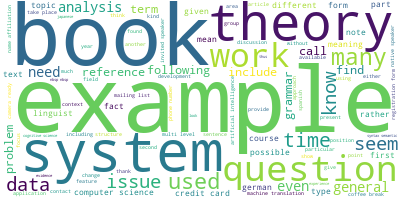

In [54]:
wordcloud.to_image()


In [55]:
#### check if there are words that starts with uppercase

uppercase = []
for email in processed_email_1:
    for word in email.split():
        if re.search('^[A-Z]', word):
            uppercase.append(word)
        
uppercase


[]

## Topic Modeling using Latent Dirichlet Allocation

##### Load Gensim packages 

In [56]:
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

##### Convert all emails to the list of list of tokens

In [57]:
def sent_to_words(sentences):
    for sentences in sentences:
        yield(gensim.utils.simple_preprocess(str(sentences)))
        

In [58]:
data = processed_email_1

In [59]:
data_words = list(sent_to_words(data))
for sent in data_words:
    for word in sent:
        if word in stopwords_extra:
            sent.remove(word)
        





In [ ]:
data_words[:19]

##### Create Dictionary 

This dictionary is the key(index) and value of all the words of the processed emails.  

In [61]:
corpus_dict = corpora.Dictionary (data_words)

print(corpus_dict)


Dictionary(22243 unique tokens: ['application', 'area', 'becoming', 'business', 'call']...)


##### Create Document Term Matrix

In [62]:
emails = data_words

In [63]:
doc_term_matrix = [corpus_dict.doc2bow(email) for email in emails] 

In [64]:
print(doc_term_matrix[:][1000])

[(5, 1), (11, 1), (44, 3), (60, 1), (87, 1), (94, 2), (96, 1), (97, 1), (108, 1), (146, 1), (176, 1), (232, 1), (249, 2), (254, 3), (284, 1), (311, 1), (322, 1), (323, 1), (347, 6), (370, 1), (473, 1), (484, 1), (514, 1), (554, 1), (583, 1), (628, 1), (630, 2), (637, 1), (643, 2), (650, 1), (656, 1), (701, 1), (724, 1), (732, 1), (737, 2), (756, 1), (763, 1), (783, 1), (825, 1), (845, 1), (846, 1), (877, 1), (897, 1), (926, 4), (966, 1), (979, 2), (1026, 1), (1029, 1), (1046, 1), (1094, 4), (1110, 1), (1129, 1), (1246, 1), (1262, 1), (1288, 1), (1303, 3), (1319, 2), (1383, 2), (1441, 1), (1516, 1), (1595, 1), (1697, 1), (1721, 1), (1858, 1), (1900, 1), (1949, 2), (1962, 1), (2009, 1), (2030, 1), (2075, 2), (2219, 1), (2249, 1), (2251, 3), (2380, 1), (2479, 2), (2526, 1), (2561, 1), (2569, 1), (2589, 1), (2621, 1), (2700, 1), (2850, 2), (3209, 1), (3467, 1), (3520, 4), (3699, 1), (3830, 1), (3932, 2), (3943, 4), (3960, 1), (4038, 1), (4100, 1), (4101, 1), (4329, 1), (4369, 1), (4439, 1)

### LDA Model Training 

In [65]:
from pprint import pprint


In [66]:
Lda = gensim.models.ldamodel.LdaModel


In [67]:
ldamodel = Lda(doc_term_matrix, num_topics =8, id2word = corpus_dict, passes = 20, random_state = 0, eval_every = None)


In [68]:
ldamodel.print_topics()


[(0,
  '0.011*"free" + 0.010*"nbsp" + 0.009*"capitalfm" + 0.009*"site" + 0.009*"link" + 0.008*"music" + 0.007*"video" + 0.007*"click" + 0.007*"live" + 0.005*"check"'),
 (1,
  '0.007*"book" + 0.006*"issue" + 0.005*"volume" + 0.005*"theory" + 0.004*"international" + 0.004*"resource" + 0.004*"world" + 0.004*"text" + 0.004*"publication" + 0.004*"application"'),
 (2,
  '0.005*"syntax" + 0.005*"korean" + 0.004*"spanish" + 0.004*"american" + 0.004*"dialect" + 0.004*"japanese" + 0.004*"german" + 0.003*"phonology" + 0.003*"vowel" + 0.003*"break"'),
 (3,
  '0.013*"registration" + 0.012*"workshop" + 0.007*"session" + 0.006*"break" + 0.006*"logic" + 0.005*"form" + 0.005*"hotel" + 0.005*"lunch" + 0.005*"coffee" + 0.005*"name"'),
 (4,
  '0.017*"abstract" + 0.015*"submission" + 0.010*"workshop" + 0.008*"session" + 0.007*"author" + 0.007*"call" + 0.006*"student" + 0.006*"deadline" + 0.006*"copy" + 0.005*"committee"'),
 (5,
  '0.005*"system" + 0.004*"like" + 0.003*"people" + 0.003*"workshop" + 0.003*"l

#### Topic Coherence

In [69]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model =ldamodel, texts = emails, dictionary = corpus_dict, coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()

In [70]:
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5203693589740552


### Model improvement 

In [72]:
def compute_coherence_values(dictionary, corpus, text, limit, start = 1, step = 1):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = Lda(corpus= doc_term_matrix, num_topics = num_topics, random_state = 42,
                   passes = 10, per_word_topics = True, id2word =dictionary)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts = emails, dictionary= corpus_dict, coherence = 'c_v')
        coherence_values.append(coherencemodel.get_coherence())
    
    return model_list, coherence_values

In [73]:
model_list, coherence_values = compute_coherence_values(dictionary = corpus_dict, corpus = doc_term_matrix, text = emails, start = 1, limit = 15, step = 1)

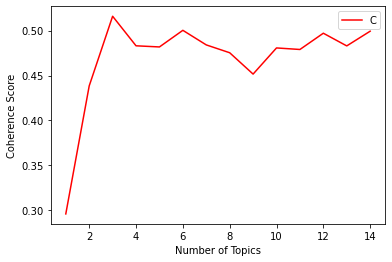

In [118]:
limit = 15; start = 1; step = 1 
x = range(start, limit, step)
plt.plot(x, coherence_values, color = 'red')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.legend (("Coherence_values"), loc = 'best')
plt.show()

In [ ]:
#lda_model = gensim.models.LdaMulticore(corpus = corpus, 
                                      #id2word = corpus_dict, num_topics = 6)

In [75]:
ldamodel_improved = Lda(doc_term_matrix, num_topics = 3, id2word = corpus_dict, passes = 20, random_state = 42, eval_every = None)


In [76]:
ldamodel_improved.print_topics()


[(0,
  '0.005*"book" + 0.005*"theory" + 0.003*"grammar" + 0.003*"syntax" + 0.003*"analysis" + 0.003*"structure" + 0.003*"verb" + 0.003*"work" + 0.003*"example" + 0.003*"question"'),
 (1,
  '0.008*"report" + 0.008*"program" + 0.007*"list" + 0.006*"name" + 0.006*"people" + 0.006*"time" + 0.006*"free" + 0.005*"send" + 0.005*"money" + 0.005*"make"'),
 (2,
  '0.010*"workshop" + 0.008*"abstract" + 0.007*"submission" + 0.006*"session" + 0.005*"system" + 0.005*"registration" + 0.004*"call" + 0.004*"author" + 0.004*"student" + 0.003*"science"')]

#### Improved model topic coherence score 

In [77]:
coherence_model_lda_imp = CoherenceModel(model = ldamodel_improved, texts = emails, dictionary = corpus_dict, coherence ='c_v')
coherence_lda_improved = coherence_model_lda_imp.get_coherence()
print('\nCoherence Score: ', coherence_lda_improved)


Coherence Score:  0.5345622651825489


#### Load Visualization Packages

In [79]:

import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

%matplotlib inline


In [80]:
pyLDAvis.enable_notebook()

In [81]:
vis = gensimvis.prepare(ldamodel_improved, doc_term_matrix, corpus_dict, mds = "mmds")
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.048328  0.093730       1        1  36.415269
2      0.095184 -0.100353       2        1  32.340225
1     -0.143512  0.006623       3        1  31.244506, topic_info=            Term         Freq        Total Category  logprob  loglift
6595    workshop  5667.000000  5667.000000  Default  30.0000  30.0000
3733  submission  4091.000000  4091.000000  Default  29.0000  29.0000
6393    abstract  4450.000000  4450.000000  Default  28.0000  28.0000
249       report  4597.000000  4597.000000  Default  27.0000  27.0000
227        money  2760.000000  2760.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
38          much  1205.028624  1945.732429   Topic3  -5.9993   0.6842
228       number  1460.917564  3676.272186   Topic3  -5.8067   0.2405
274         take  1278.618575  2540.495603   Topic3  -5.9400   0.4767
202        first  1356.475890  3928.100292   Topic3  -5.8809   0.1001
605         site  1248.750870  2543.774534   Topic3  -5.9636   0.4518

[353 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
9800       3  0.979845        aaal
6393       1  0.079317    abstract
6393       2  0.866865    abstract
6393       3  0.053926    abstract
2944       1  0.075949  acceptance
...      ...       ...         ...
6595       3  0.015350    workshop
16240      1  0.983365        xxii
62         1  0.195394        year
62         2  0.166980        year
62         3  0.637750        year

[786 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

## Topic distribution 

##### Distributions of topic of document (each email)

In [82]:
doc = []
count = 0
for i in ldamodel_improved[doc_term_matrix]:
    count += 1
    doc.append( ("doc:", count, i))
doc[0:8]

[('doc:', 1, [(1, 0.99086064)]),
 ('doc:', 2, [(1, 0.99225235)]),
 ('doc:', 3, [(1, 0.9248747), (2, 0.06649985)]),
 ('doc:', 4, [(1, 0.9975228)]),
 ('doc:', 5, [(1, 0.99809337)]),
 ('doc:', 6, [(1, 0.99810654)]),
 ('doc:', 7, [(1, 0.991155)]),
 ('doc:', 8, [(1, 0.9975004)])]

In [101]:
def format_topics_sentences (ldamodel = None, corpus = doc_term_matrix, texts = emails):
    sent_topics_df = pd.DataFrame()
    
    for i, row_list in enumerate(ldamodel_improved[doc_term_matrix]):
        row = row_list[0] if ldamodel_improved.per_word_topics else row_list
        row = sorted(row, key = lambda x:(x[1]), reverse = True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel_improved.show_topic(topic_num)
                topic_key_words = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic, 4),
                                                                  topic_key_words]), ignore_index = True)
            else:
                break
    sent_topics_df.columns =['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis = 1)
    return(sent_topics_df)

In [102]:
df_topic_sents_keywords = format_topics_sentences(ldamodel = ldamodel_improved, corpus = doc_term_matrix, texts = emails)
df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,1,0.9909,"report, program, list, name, people, time, fre...","[great, part, time, summer, display, credit, a..."
1,1,0.9923,"report, program, list, name, people, time, fre...","[auto, insurance, rate, high, dear, nlpeople, ..."
2,1,0.9249,"report, program, list, name, people, time, fre...","[want, best, economical, hunting, vacation, li..."
3,1,0.9975,"report, program, list, name, people, time, fre...","[million, people, million, want, make, money, ..."
4,1,0.9981,"report, program, list, name, people, time, fre...","[miss, attention, warning, adult, warning, adu..."
...,...,...,...,...
2600,2,0.9963,"workshop, abstract, submission, session, syste...","[computationally, intensive, method, quantitat..."
2601,0,0.6897,"book, theory, grammar, syntax, analysis, struc...","[book, survey, american, publishing, house, mo..."
2602,2,0.9561,"workshop, abstract, submission, session, syste...","[wecol, western, arizona, state, cordially, in..."
2603,2,0.9437,"workshop, abstract, submission, session, syste...","[euralex, revised, programme, euralex, liege, ..."


In [85]:
df_topic_distribution = df_topic_sents_keywords['Dominant_Topic'].value_counts().reset_index(name = "num Documents")
df_topic_distribution.columns = ['Dominant_Topic', 'Num Documents']
df_topic_distribution.sort_values("Dominant_Topic")


,Dominant_Topic,Num Documents
0,0,991
1,1,861
2,2,753


In [110]:
new_df = df_topic_sents_keywords.copy()
new_df.rename(columns = {0: "Email Text"}, inplace = True)


In [111]:
new_df['Label'] = dataframe["Label"]

In [112]:
new_df.head(10)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Email Text,Label
0,1,0.9909,"report, program, list, name, people, time, fre...","[great, part, time, summer, display, credit, a...",1
1,1,0.9923,"report, program, list, name, people, time, fre...","[auto, insurance, rate, high, dear, nlpeople, ...",1
2,1,0.9249,"report, program, list, name, people, time, fre...","[want, best, economical, hunting, vacation, li...",1
3,1,0.9975,"report, program, list, name, people, time, fre...","[million, people, million, want, make, money, ...",1
4,1,0.9981,"report, program, list, name, people, time, fre...","[miss, attention, warning, adult, warning, adu...",1
5,1,0.9981,"report, program, list, name, people, time, fre...","[amazing, world, record, attention, warning, a...",1
6,1,0.9912,"report, program, list, name, people, time, fre...","[help, loan, debt, help, qualifying, fingertip...",1
7,1,0.9975,"report, program, list, name, people, time, fre...","[beat, read, founding, father, united, state, ...",1
8,1,0.9975,"report, program, list, name, people, time, fre...","[million, people, million, want, make, money, ...",1
9,1,0.9791,"report, program, list, name, people, time, fre...","[make, week, using, home, computer, free, soft...",1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


Text(0.5, 1.0, 'Spam and not-Spam email by Topic')

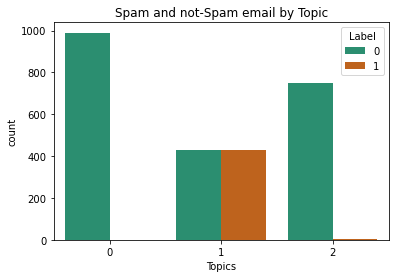

In [113]:
import seaborn as sns
sns.countplot(data = new_df, x = 'Dominant_Topic', hue = 'Label', palette = 'Dark2')
plt.xlabel ('Topics')
plt.title ('Spam and not-Spam email by Topic')


### Visualize Topics - in WordCloud 

In [114]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [115]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]


In [116]:
cloud = WordCloud(stopwords = stop_words, 
                 background_color = 'white', 
                 width = 2500,
                 height = 2800,
                 max_words = 20, 
                 colormap = 'tab10',
                 color_func = lambda *args, **kwargs :cols[i],
                 prefer_horizontal = 1.0)

In [93]:
topics = ldamodel_improved.show_topics(formatted = False)
topics

[(0,
  [('book', 0.005423746),
   ('theory', 0.005245989),
   ('grammar', 0.0032168725),
   ('syntax', 0.003033063),
   ('analysis', 0.0030267218),
   ('structure', 0.0029154478),
   ('verb', 0.002777601),
   ('work', 0.0027442395),
   ('example', 0.0027231064),
   ('question', 0.0026439596)]),
 (1,
  [('report', 0.007937217),
   ('program', 0.007584165),
   ('list', 0.0066938447),
   ('name', 0.0063566067),
   ('people', 0.0063348473),
   ('time', 0.0059706075),
   ('free', 0.005588175),
   ('send', 0.005434623),
   ('money', 0.0051834523),
   ('make', 0.0051163468)]),
 (2,
  [('workshop', 0.00983098),
   ('abstract', 0.0076717525),
   ('submission', 0.0074396892),
   ('session', 0.0061624027),
   ('system', 0.00464362),
   ('registration', 0.004637332),
   ('call', 0.003979577),
   ('author', 0.0038806007),
   ('student', 0.0035229775),
   ('science', 0.0034954124)])]

In [117]:
topics.append((3, [('dummy', 0.45566), ('summy', 0.5666)]))

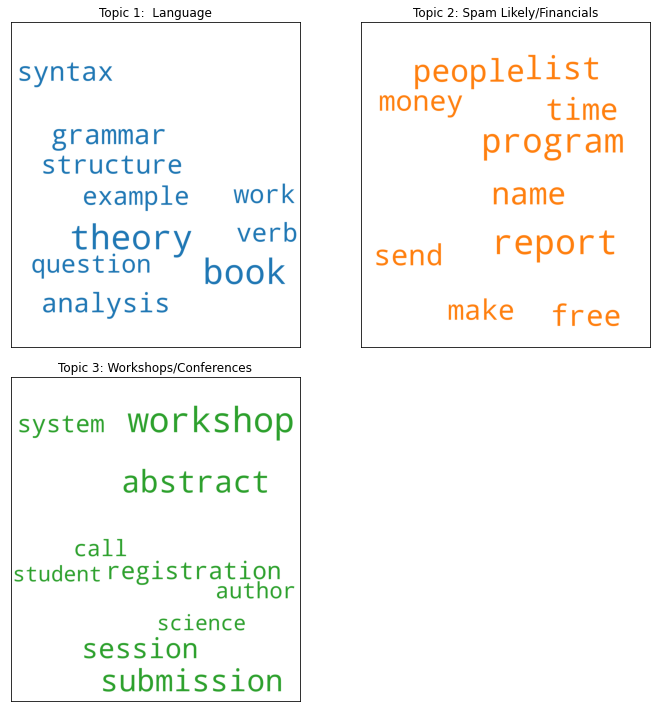

In [96]:
fig, axes = plt.subplots(2,2, figsize =(10,10))
#axes[1,2].remove()
axes[1,1].set_visible(False)
#my_topics = ['Investment', 'Tech-Product', 'Delivery', 'Companies', 'Office', 'Promotionals']
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size = 300)
    plt.gca().imshow(cloud)
    #plt.gca().set_title('Topic ' + str([i]), fontdict = dict(size= 15))
    #plt.gca().set_title(str([topic for topic in my_topics]), fontdict = dict(size = 20))
    plt.gca().axis('on')
    #for xlabel_i in plt.gca().axes.get_xticklabels():
        #xlabel_i.set_visible(False)
axes[0,0].set_title('Topic 1:  Language')
axes[0,1].set_title('Topic 2: Spam Likely/Financials')
axes[1,0].set_title('Topic 3: Workshops/Conferences')
#axes[1,0].set_title('Topic 4: ....')
#axes[1,1].set_title('Topic 5: ....')
#axes[1,2].set_title('Topic 6: Promotionals')
plt.subplots_adjust(wspace = 2, hspace = 2)
for ax in axes.flat:
    ax.axes.yaxis.set_visible(False)
    ax.axes.xaxis.set_visible(False)

#plt.axis('off')
plt.margins(x=0.2, y=0.22)
plt.tight_layout()
for ax in axes.flat:
    ax.label_outer()
plt.show()

## CountVectorizer Implementation from scikit-learn 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk import ne_chunk
stop_words = set(nltk.corpus.stopwords.words('english'))

In [ ]:
vect = TfidfVectorizer(stop_words = stop_words, max_features = 1000)

In [ ]:
vect_text = vect.fit_transform(processed_email_1)

In [ ]:
print(vect_text.shape)

In [ ]:
idf = vect.idf_

In [ ]:
dd = dict(zip(vect.get_feature_names(), idf))
l = sorted(dd, key = (dd).get)

In [ ]:
print(l[0], l[-1])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation 

In [ ]:
lda_model = LatentDirichletAllocation(n_components = 6, learning_method = 'online', random_state = 0, max_iter =20)

In [ ]:
lda_top = lda_model.fit_transform(vect_text)

In [ ]:
print(lda_top.shape)

In [ ]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")